# Análisis Completo de Datos de Clientes de Aerolíneas

## Introducción:
Este notebook proporciona un análisis completo paso a paso desde la carga de datos hasta análisis estadísticos, incluyendo la visualización y la preparación de datos.

Fase 1: Exploración y Limpieza

In [237]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
pd.set_option('display.max_columns', None)

In [238]:
# Carga de datos
flight_activity = pd.read_csv('Customer Flight Activity.csv')
loyalty_history = pd.read_csv('Customer Loyalty History.csv')

# Visualización preliminar
flight_activity.head(2) 

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0


In [239]:
loyalty_history.head(2)

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN


Combinamos los datos usando la columna en común 'Loyalty Number' como clave:

In [240]:
df = pd.merge(flight_activity, loyalty_history, on='Loyalty Number', how='inner')
df.head(2)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
1,100018,2017,2,2,2,4,1320,132.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN


In [241]:
df.shape

(405624, 25)

Visualizamos uno de los valores duplicados para elegir técnica de eliminación:

In [242]:
df[df['Loyalty Number'] == 100018]

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
1,100018,2017,2,2,2,4,1320,132.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
2,100018,2018,10,6,4,10,3110,311.0,385,31,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
3,100018,2017,4,4,0,4,924,92.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
4,100018,2017,5,0,0,0,0,0.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
5,100018,2017,6,4,1,5,4330,433.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
6,100018,2017,7,10,0,10,3870,387.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
7,100018,2017,9,9,4,13,1651,165.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
8,100018,2017,8,10,5,15,4200,420.0,690,56,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
9,100018,2017,10,6,0,6,1032,103.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN


Decidimos borrar duplicados quedándonos con el último registro que contiene todos los valores anteriores actualizados:

In [243]:
df.drop_duplicates(subset=['Loyalty Number'], inplace=True, keep='last')
df[df['Loyalty Number'] == 100018]

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
23,100018,2018,12,17,6,23,4945,494.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN


In [244]:
df.duplicated().sum()

0

Creamos un filtro para identificar columnas que puedan contener valores negativos:

In [245]:
df_numerico = df.select_dtypes(include = [np.number])

filtro = (df_numerico < 0).any()

columnas_negativas = df_numerico.columns[filtro]
print("Columnas numéricas con valores negativos:", columnas_negativas)

Columnas numéricas con valores negativos: Index(['Salary'], dtype='object')


In [246]:
valores_negativos = df['Salary'][df['Salary'] < 0]
valores_negativos

6431     -10605.0
21503    -58486.0
38519    -31911.0
46895    -49001.0
54887    -46683.0
57647    -47310.0
102743   -39503.0
110591    -9081.0
136919   -17534.0
161735   -43234.0
175055   -45962.0
182039   -49830.0
206111   -19325.0
256919   -19332.0
258959   -46303.0
281615   -34079.0
325703   -57297.0
346511   -12497.0
385439   -26322.0
387695   -46470.0
Name: Salary, dtype: float64

 Asumimos que los valores negativos en la columna 'Salary' pueden ser un error humano al ingresar los datos o un error en el sistema que los procesa:
 -  Algunas veces, durante la exportación o importación de datos entre diferentes sistemas o formatos, los valores pueden ser mal interpretados o alterados, resultando en valores negativos.

Procedemos a convertirlos a su valor absoluto con el método abs() (convierte valores negativos a positivos) de pandas en el DataFrame original:

In [247]:
df['Salary'] = df['Salary'].abs()
valores_negativos = df['Salary'][df['Salary'] < 0]
valores_negativos 

Series([], Name: Salary, dtype: float64)

Visualizamos valores nulos en porcentajes:

In [248]:
porcentaje_nulos = df.isnull().sum() / df.shape[0] * 100
porcentaje_nulos 

Loyalty Number                  0.000000
Year                            0.000000
Month                           0.000000
Flights Booked                  0.000000
Flights with Companions         0.000000
Total Flights                   0.000000
Distance                        0.000000
Points Accumulated              0.000000
Points Redeemed                 0.000000
Dollar Cost Points Redeemed     0.000000
Country                         0.000000
Province                        0.000000
City                            0.000000
Postal Code                     0.000000
Gender                          0.000000
Education                       0.000000
Salary                         25.321145
Marital Status                  0.000000
Loyalty Card                    0.000000
CLV                             0.000000
Enrollment Type                 0.000000
Enrollment Year                 0.000000
Enrollment Month                0.000000
Cancellation Year              87.650117
Cancellation Mon

- Reemplazamos valores nulos de la columna 'Salary' con la mediana. 
- Para 'Cancellation Year' y 'Cancellation Month' 87% de nulos es un resultado esperado, así que no los reemplazamos ni tampoco nos deshacemos de las columnas al ser relevante el hecho de que contenga valores nulos (quiere decir que han habido muy pocas cancelaciones)

In [249]:
df['Salary'].fillna(df['Salary'].median(), inplace=True)
df['Salary'].isnull().sum()

0

Buscamos errores ortográficos o inconsistencias en la forma de escribir los datos en las columnas categoricas en caso que tengamos que normalizar el contenido (En este caso todo bien):

In [250]:
categoricas = df.select_dtypes('object').columns
for column in categoricas:
    print(f"Valores únicos en la columna {column}: {df[column].unique()}")

Valores únicos en la columna Country: ['Canada']
Valores únicos en la columna Province: ['Alberta' 'Ontario' 'British Columbia' 'Saskatchewan' 'Quebec'
 'Newfoundland' 'Manitoba' 'New Brunswick' 'Nova Scotia'
 'Prince Edward Island' 'Yukon']
Valores únicos en la columna City: ['Edmonton' 'Toronto' 'Dawson Creek' 'Vancouver' 'Regina' 'Montreal'
 'Sudbury' 'Quebec City' 'Peace River' "St. John's" 'Tremblant' 'Ottawa'
 'Trenton' 'Winnipeg' 'Thunder Bay' 'West Vancouver' 'Fredericton'
 'London' 'Halifax' 'Moncton' 'Banff' 'Kingston' 'Whistler'
 'Charlottetown' 'Hull' 'Victoria' 'Calgary' 'Kelowna' 'Whitehorse']
Valores únicos en la columna Postal Code: ['T9G 1W3' 'M1R 4K3' 'U5I 4F1' 'V5R 1W3' 'P1L 8X8' 'P1J 8T7' 'S6J 3G0'
 'H2T 9K8' 'V6E 3D9' 'M5V 1G5' 'H2Y 4R4' 'M8Y 4K8' 'V6E 3Z3' 'G1B 3L5'
 'T9O 2W2' 'A1C 6H9' 'H5Y 2S9' 'K1F 2R2' 'K8V 4B2' 'R3R 3T4' 'P1W 1K4'
 'K8T 5M5' 'V6V 8Z3' 'M2M 7K8' 'E3B 2H2' 'M5B 3E4' 'H2Y 2W2' 'P5S 6R4'
 'P2T 6G3' 'B3J 9S2' 'B3C 2M8' 'H4G 3T4' 'R6Y 4T5' 'H2T 2J6

Verificamos que las columnas del DataFrame esten en un formato adecuado para nuestro análisis:

In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16737 entries, 23 to 405623
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Loyalty Number               16737 non-null  int64  
 1   Year                         16737 non-null  int64  
 2   Month                        16737 non-null  int64  
 3   Flights Booked               16737 non-null  int64  
 4   Flights with Companions      16737 non-null  int64  
 5   Total Flights                16737 non-null  int64  
 6   Distance                     16737 non-null  int64  
 7   Points Accumulated           16737 non-null  float64
 8   Points Redeemed              16737 non-null  int64  
 9   Dollar Cost Points Redeemed  16737 non-null  int64  
 10  Country                      16737 non-null  object 
 11  Province                     16737 non-null  object 
 12  City                         16737 non-null  object 
 13  Postal Code        

Guardamos el DataFrame limpio (opcional en términos de lo que pide esta evaluación):

In [252]:
df.to_csv('Flight Activity and Customer Loyalty-CLEAN.csv', index = False)

## Fase 2: Visualización de Datos

#### 3. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

In [253]:
df.columns

Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed',
       'Country', 'Province', 'City', 'Postal Code', 'Gender', 'Education',
       'Salary', 'Marital Status', 'Loyalty Card', 'CLV', 'Enrollment Type',
       'Enrollment Year', 'Enrollment Month', 'Cancellation Year',
       'Cancellation Month'],
      dtype='object')

Utilizamos pivot_table con una función de agregación de suma para poder usar un Heatmap y comprobamos resultados.

In [254]:
df_reservas_pivot = df.pivot_table(index="Month", columns="Year", values="Flights Booked", aggfunc='sum')
df_reservas_pivot

Year,2017,2018
Month,,
1,129,156
2,113,119
3,148,206
4,149,225
5,171,223
6,221,284
7,267,310
8,248,206
9,173,273


Elegimos un gráfico 'Heatmap' para visualizar meses en los que se hacen más reservas o viceversa en los años disponibles:

Justificación para usar un 'Heatmap':
- Comparación inmediata: Permite comparar visualmente la intensidad de los datos entre diferentes meses y años con un simple vistazo, destacando los meses con mayor o menor actividad.
- Escalabilidad: Maneja bien grandes volúmenes de datos, como en este caso, donde se representan varios meses a lo largo de múltiples años.

In [255]:
df.Year.unique(), df.Year.dtypes

(array([2018, 2017]), dtype('int64'))

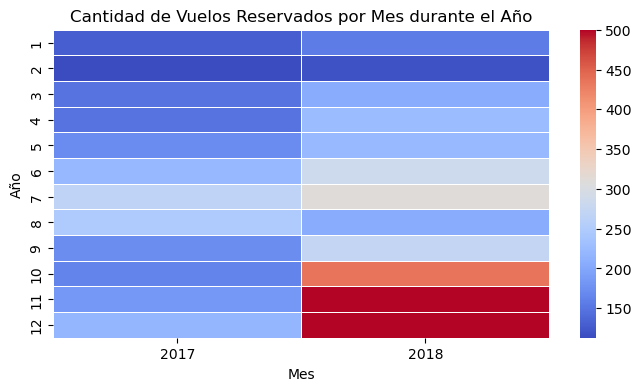

In [256]:
plt.figure(figsize=(8, 4))
sns.heatmap(df_reservas_pivot, cmap="coolwarm", linewidths=.5, vmax=500)  # Ajustamos vmax para una mejor escala de color, de lo contrario tendriamos menos colores.
plt.title('Cantidad de Vuelos Reservados por Mes durante el Año')
plt.ylabel('Año')
plt.xlabel('Mes');

Interpretación de la gráfica:
- La gráfica muestra que la mayoría de los meses durante 2017 y 2018 tuvieron una cantidad baja a moderada de vuelos reservados (representado en tonos azules), excepto en diciembre de 2018, que tuvo un notable aumento en la cantidad de vuelos reservados (indicado por los tonos rojos y anaranjados). Esto sugiere un pico de actividad en diciembre de 2018, posiblemente debido a la temporada de vacaciones.

#### 4. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los clientes?

Justificación para usar un gráfico de dispersión (scatterplot):
- Relación entre variables: El gráfico de dispersión muestra la relación entre dos variables cuantitativas.
- Identificación de tendencias: Permite observar fácilmente si existe una tendencia o patrón entre las variables.
- Detección de outliers y variabilidad: Ayuda a identificar si hay datos atípicos o una variabilidad significativa en los datos.

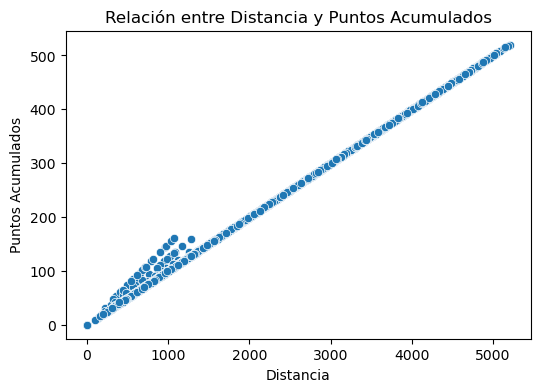

In [257]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Distance', y='Points Accumulated', data=df)
plt.title('Relación entre Distancia y Puntos Acumulados')
plt.xlabel('Distancia')
plt.ylabel('Puntos Acumulados');

Interpretación de la gráfica:
- La gráfica muestra una relación positiva y lineal entre la distancia y los puntos acumulados, lo que indica que a medida que aumenta la distancia recorrida, también lo hacen los puntos acumulados. Esto sugiere que los puntos se otorgan en proporción a la distancia recorrida, y el sistema de puntos parece ser bastante consistente a lo largo de diferentes distancias, excepto en las menores distancias donde observamos una mayor dispersión de puntos.

#### 5. ¿Cuál es la distribución de los clientes por provincia o estado?

Justificación del uso de un gráfico de barras horizontales (Countplot):
- Comparación clara entre categorías: Este tipo de gráfico es efectivo para comparar cantidades entre diferentes categorías (provincias en este caso), donde las barras facilitan la visualización y comparación directa de los tamaños.
- Visualización eficiente para nombres largos: Al colocar las etiquetas de las provincias de forma horizontal, se facilita la lectura de nombres más largos sin requerir rotación o ajuste del texto.

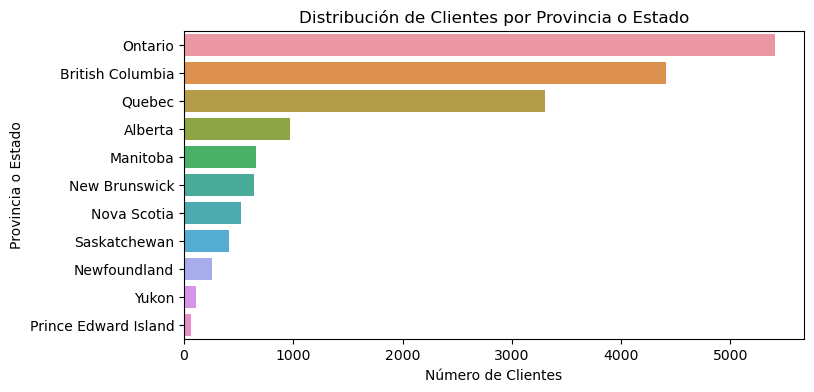

In [258]:
plt.figure(figsize=(8, 4))
sns.countplot(y='Province', data=df, order = df['Province'].value_counts().index)
plt.title('Distribución de Clientes por Provincia o Estado')
plt.xlabel('Número de Clientes')
plt.ylabel('Provincia o Estado');

Interpretación de la gráfica:
- Ontario tiene el mayor número de clientes, superando los 4500, seguido por British Columbia y Quebec con aproximadamente 3000 y 2500 clientes respectivamente. Las provincias con menos clientes son Yukon y Prince Edward Island, cada una con menos de 500 clientes.

#### 6. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

Justificación del uso de Gráfico de barras horizontales:
- Clara comparación de magnitudes: El gráfico permite una comparación directa de los salarios promedio entre los diferentes niveles de educación, destacando visualmente las diferencias.
- Espacio para etiquetas: Las barras horizontales ofrecen suficiente espacio para incluir etiquetas de texto completas sin solapamiento, lo que facilita la lectura y comprensión de cada categoría.
- Efectividad en la presentación de rangos amplios de datos: Este gráfico es particularmente efectivo para mostrar rangos amplios de datos.

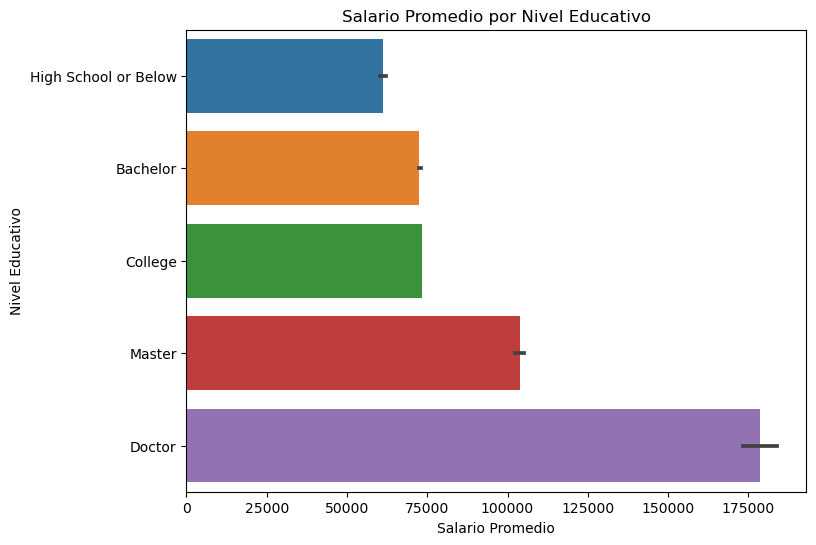

In [259]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Salary', y='Education', data=df,order=df.groupby('Education')['Salary'].mean().sort_values().index)
plt.title('Salario Promedio por Nivel Educativo')
plt.xlabel('Salario Promedio')
plt.ylabel('Nivel Educativo');

##### Interpretación de la gráfica:
La gráfica muestra el salario promedio por nivel educativo. Se observa un patrón claro en el que el nivel de educación afecta significativamente el salario promedio:

- High School or Below: Aproximadamente $25,000
- College: Aproximadamente $50,000
- Bachelor: Aproximadamente $75,000
- Master: Aproximadamente $100,000
- Doctor: Aproximadamente $175,000

#### 7. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

Justificación del uso de Diagrama Pastel('Pie'):
- Visualización de proporciones: Los diagramas de pastel son efectivos para mostrar cómo se dividen los porcentajes o proporciones de un todo entre diferentes categorías.
- Comparación inmediata: Permite una comparación rápida y visual entre las diferentes categorías de tarjetas de fidelidad

In [260]:
conteo_tajetas_fidelidad = df['Loyalty Card'].value_counts() # Hacemos un conteo del número de clientes que poseen cada tipo de tarjeta
conteo_tajetas_fidelidad 

Loyalty Card
Star      7637
Nova      5671
Aurora    3429
Name: count, dtype: int64

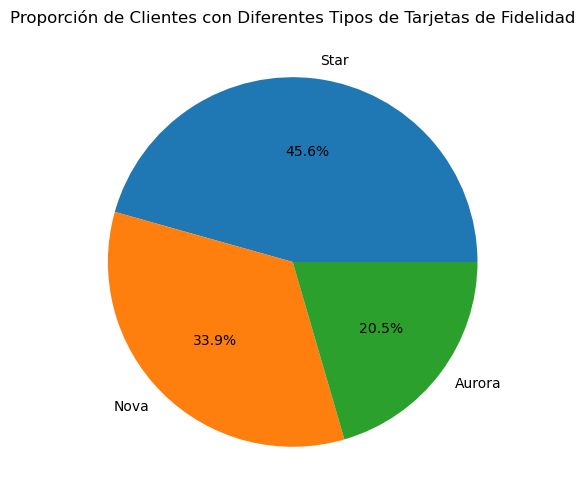

In [261]:
plt.figure(figsize=(10, 6))
conteo_tajetas_fidelidad.plot(kind='pie', autopct='%1.1f%%')
plt.title('Proporción de Clientes con Diferentes Tipos de Tarjetas de Fidelidad')
plt.ylabel('')
plt.show()

##### Interpretación de la gráfica:
La gráfica muestra la proporción de clientes que tienen diferentes tipos de tarjetas de fidelidad. En este caso podemos ver que hay más clientes con la tarjeta 'Star':

- Star: 45.6% de los clientes
- Nova: 33.9% de los clientes
- Aurora: 20.5% de los clientes

#### 8. ¿Cómo se distribuyen los clientes según su estado civil y género.

pd.crosstab() en Pandas crea tablas de contingencia, que son útiles para analizar la relación entre dos variables categóricas. 

In [262]:
tabla_contingencia_marital_gender = pd.crosstab(df['Marital Status'], df['Gender'])
tabla_contingencia_marital_gender 

Gender,Female,Male
Marital Status,,
Divorced,1269,1249
Married,4869,4866
Single,2272,2212


Justificación del uso de Diagrama Pastel('Pie'):
- Este tipo de gráfico es útil para mostrar no solo las cantidades totales por categoría (en este caso, estado civil), sino también la composición interna de esas categorías en términos de otra variable (género).
- Visualización de subgrupos: Permite visualizar cómo se distribuyen los géneros dentro de cada estado civil, facilitando la comparación directa entre subgrupos.

<Figure size 1000x600 with 0 Axes>

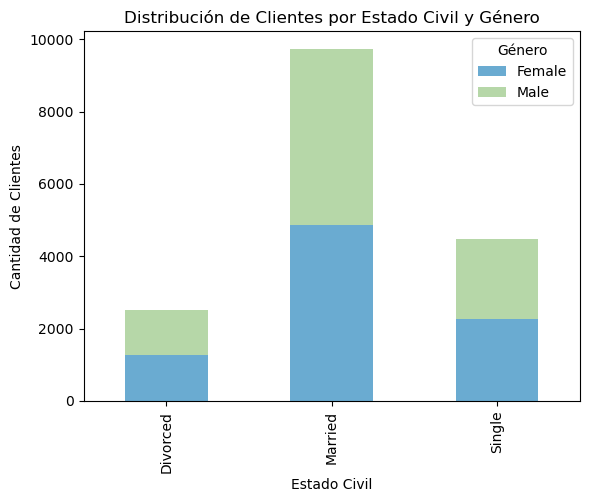

In [263]:
plt.figure(figsize=(10, 6))
tabla_contingencia_marital_gender.plot(kind='bar', stacked=True, color=['#6aabd1', '#b6d7a8'])
plt.title('Distribución de Clientes por Estado Civil y Género')
plt.ylabel('Cantidad de Clientes')
plt.xlabel('Estado Civil')
plt.legend(title='Género');

Interpretación de la Gráfica:
- Divorciados: La cantidad de clientes masculinos y femeninos es aproximadamente similar, con un poco más de mujeres que hombres.
- Casados: Es el grupo más numeroso, con una mayoría de mujeres sobre hombres.
- Solteros: Similar al grupo de divorciados, hay un poco más de mujeres que hombres, aunque la diferencia no es tan pronunciada como en el grupo de casados.

#### Fase 3: Evaluación de Diferencias en Reservas de Vuelos por Nivel Educativo

#### 9. Preparación de Datos:
- Filtra el conjunto de datos para incluir únicamente las columnas relevantes: 
'Flights Booked' y 'Education'.

In [264]:
df_education = df[['Education','Flights Booked']]
df_education

,Education,Flights Booked
23,Bachelor,17
47,College,14
71,College,0
95,Bachelor,10
119,Bachelor,0
...,...,...
405527,College,0
405551,College,0
405575,Bachelor,0
405599,Bachelor,0


#### 10. Análisis Descriptivo:
- Agrupa los datos por nivel educativo y calcula estadísticas descriptivas básicas 
(como el promedio, la desviación estandar, los percentiles) del número de vuelos 
reservados para cada grupo.

In [265]:
df_education_agrupado = df.groupby('Education')['Flights Booked'].agg(['mean', 'std', 'count', 'median'])
df_education_agrupado

,mean,std,count,median
Education,,,,
Bachelor,4.996181,5.631107,10475,3.0
College,5.105946,5.704414,4238,3.0
Doctor,4.824251,5.654240,734,2.0
High School or Below,5.176471,5.786165,782,3.0
Master,5.395669,5.596468,508,4.0


#### 11. Prueba Estadística:
- Realiza una prueba de A/B testing para determinar si existe una diferencia 
significativa en el número de vuelos reservados entre los diferentes niveles 
educativos.

Justificación de uso de Prueba ANOVA:
- Usamos prueba ANOVA ya que esta se utiliza para determinar si hay diferencias estadísticamente significativas entre las medias de tres o más grupos independientes. En este caso tenemos cinco grupos.

In [266]:
# Agrupamos por nivel de educación y transformamos los datos a lista para poder ser procesados
grupos = df_education.groupby('Education')['Flights Booked'].apply(list)

# Extraemos los datos de 'Flights Booked' para cada nivel educativo
bachelor = grupos.get('Bachelor', [])
college = grupos.get('College', [])
master = grupos.get('Master', [])
doctor = grupos.get('Doctor', [])
high_school_or_below = grupos.get('High School or Below', [])

# Realizamos prueba ANOVA
resultado_anova = stats.f_oneway(bachelor, college, master, doctor, high_school_or_below)

print('ANOVA Resultado:', resultado_anova)
print('P-value:', resultado_anova.pvalue)

ANOVA Resultado: F_onewayResult(statistic=1.1826082152119335, pvalue=0.3161341786487867)
P-value: 0.3161341786487867


#### Interpretación del Resultado ANOVA:

**Estadístico F:** 1.1826  
**P-valor:** 0.3161

##### Significado:

- **Hipótesis Nula (H0):** La hipótesis nula para ANOVA es que todas las medias de los grupos son iguales. En este caso, significa que no hay diferencias significativas en el número de vuelos reservados entre los diferentes niveles educativos.
- **Hipótesis Alternativa (H1):** La hipótesis alternativa es que al menos una de las medias de los grupos es diferente.

Dado que el p-valor es mayor que el nivel de significancia típico de 0.05, no rechazamos la hipótesis nula. Esto significa que no hay suficiente evidencia estadística para afirmar que las diferencias en las medias de vuelos reservados entre los diferentes niveles educativos son significativas.

##### Implicaciones Prácticas:

No hay justificación estadística, basada en esta prueba, para concluir que el nivel educativo afecta significativamente el número de vuelos reservados. Las decisiones de marketing y otros departamentos de la empresa no deberían basarse en la premisa de que diferentes niveles educativos implican diferentes comportamientos en la reserva de vuelos sin más evidencia.
